In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [14]:
photo = cv2.imread("./binary.png")
photo_gray = cv2.cvtColor(photo,cv2.COLOR_BGR2GRAY)
print(photo.shape)
print(photo_gray.shape)

(387, 497, 3)
(387, 497)


(-0.5, 496.5, 386.5, -0.5)

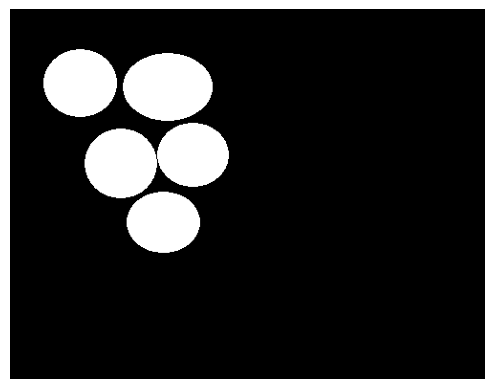

In [13]:
plt.imshow(photo_gray,cmap= "gray")
plt.axis("off")

### erosion siyah beyaz ikili goruntude beyaz piksellerin kucultulmesine daraltilmasina yarar 
### Morfolojik islemler bir matris yardimi ile gerceklesir matris = goruntu uzerinden blok blok dolastirilarak islemler yapilir

In [15]:
# 1- Erosion 
my_kernel = np.ones((5,5),dtype=np.uint8)
my_kernel


array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

(-0.5, 496.5, 386.5, -0.5)

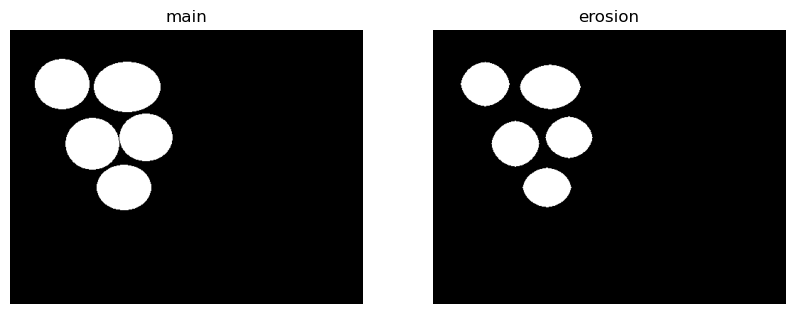

In [27]:
erosion_image = cv2.erode(photo,my_kernel,iterations = 2)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows,columns,1)
plt.title("main")
plt.imshow(photo,cmap = "gray")
plt.axis("off")



fig.add_subplot(rows,columns,2)
plt.title("erosion")
plt.imshow(erosion_image,cmap = "gray")
plt.axis("off")


(-0.5, 496.5, 386.5, -0.5)

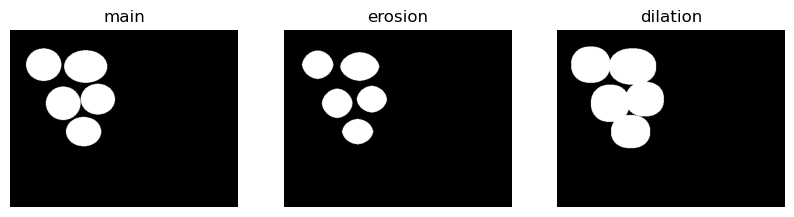

In [29]:
dilation_image = cv2.dilate(photo,my_kernel,iterations = 2)


fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 3

fig.add_subplot(rows,columns,1)
plt.title("main")
plt.imshow(photo,cmap = "gray")
plt.axis("off")



fig.add_subplot(rows,columns,2)
plt.title("erosion")
plt.imshow(erosion_image,cmap = "gray")
plt.axis("off")



fig.add_subplot(rows,columns,3)
plt.title("dilation")
plt.imshow(dilation_image,cmap = "gray")
plt.axis("off")


(-0.5, 496.5, 386.5, -0.5)

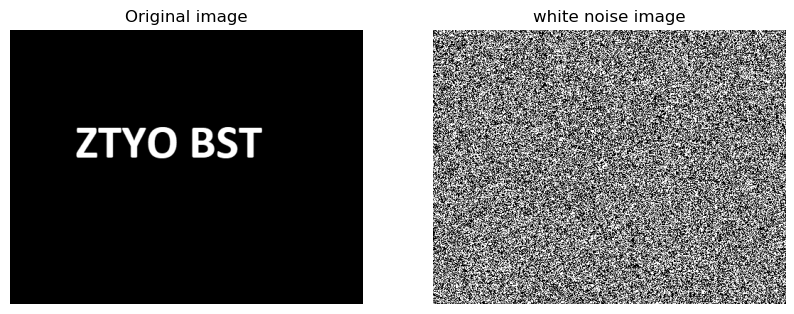

In [66]:
new_image = cv2.imread('./binary_with_text.png',0)
white_noise = np.random.randint(0,2,size = new_image.shape[:2])## yukseklik ve genisligi aliyor
white_noise = white_noise*255 # renk






fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows,columns,1)
plt.title("Original image")
plt.imshow(new_image,cmap = "gray")
plt.axis("off")



fig.add_subplot(rows,columns,2)
plt.title("white noise image")
plt.imshow(white_noise,cmap = "gray")
plt.axis("off")


(-0.5, 496.5, 386.5, -0.5)

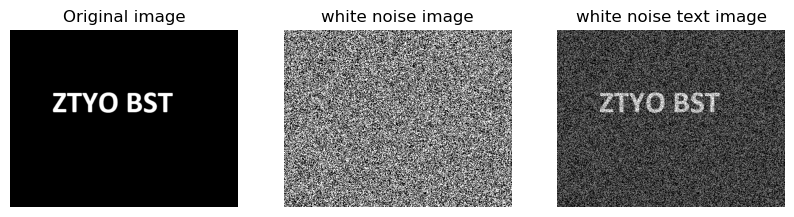

In [37]:
my_noised_img = new_image + white_noise


fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 3

fig.add_subplot(rows,columns,1)
plt.title("Original image")
plt.imshow(new_image,cmap = "gray")
plt.axis("off")



fig.add_subplot(rows,columns,2)
plt.title("white noise image")
plt.imshow(white_noise,cmap = "gray")
plt.axis("off")

fig.add_subplot(rows,columns,3)
plt.title("white noise text image")
plt.imshow(my_noised_img,cmap = "gray")
plt.axis("off")

In [38]:
my_opening_image = cv2.morphologyEx(my_noised_img.astype(np.float32),
                                   cv2.MORPH_OPEN,my_kernel)

(-0.5, 496.5, 386.5, -0.5)

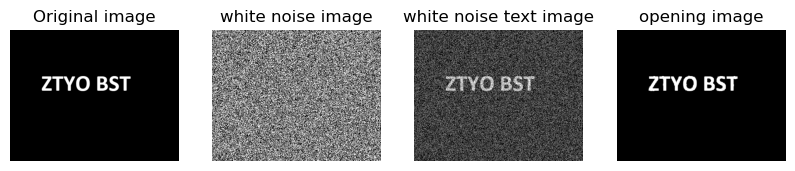

In [40]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 4

fig.add_subplot(rows,columns,1)
plt.title("Original image")
plt.imshow(new_image,cmap = "gray")
plt.axis("off")


fig.add_subplot(rows,columns,2)
plt.title("white noise image")
plt.imshow(white_noise,cmap = "gray")
plt.axis("off")

fig.add_subplot(rows,columns,3)
plt.title("white noise text image")
plt.imshow(my_noised_img,cmap = "gray")
plt.axis("off")

fig.add_subplot(rows,columns,4)
plt.title("opening image")
plt.imshow(my_opening_image,cmap = "gray")
plt.axis("off")

In [67]:
black_noise = np.random.randint(0,2,size = new_image.shape[:2])## yukseklik ve genisligi aliyor
black_noise = black_noise*-255 # renk
my_noised_black_img = new_image + black_noise


(-0.5, 496.5, 386.5, -0.5)

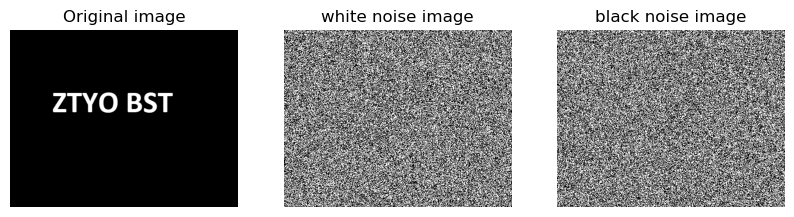

In [68]:

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 3

fig.add_subplot(rows,columns,1)
plt.title("Original image")
plt.imshow(new_image,cmap = "gray")
plt.axis("off")



fig.add_subplot(rows,columns,2)
plt.title("white noise image")
plt.imshow(white_noise,cmap = "gray")
plt.axis("off")

fig.add_subplot(rows,columns,3)
plt.title("black noise image")
plt.imshow(black_noise,cmap = "gray")
plt.axis("off")

(-0.5, 496.5, 386.5, -0.5)

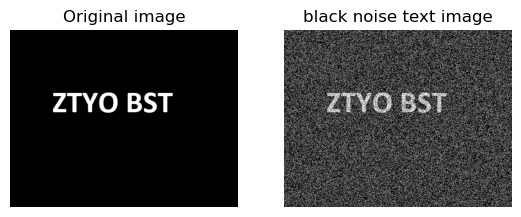

In [69]:
my_noised_black_img = new_image + black_noise

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 3

fig.add_subplot(rows,columns,1)
plt.title("Original image")
plt.imshow(new_image,cmap = "gray")
plt.axis("off")

fig.add_subplot(rows,columns,2)
plt.title("black noise text image")
plt.imshow(my_noised_black_img,cmap = "gray")
plt.axis("off")

In [70]:
my_noised_black_img[my_noised_black_img<=-245]=0

In [71]:
my_closing_image = cv2.morphologyEx(my_noised_black_img.astype(np.float32),
                                   cv2.MORPH_CLOSE,my_kernel)

(-0.5, 496.5, 386.5, -0.5)

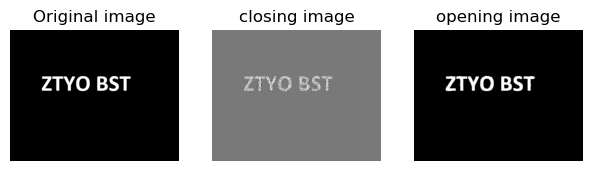

In [74]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 4

fig.add_subplot(rows,columns,1)
plt.title("Original image")
plt.imshow(new_image,cmap = "gray")
plt.axis("off")


fig.add_subplot(rows,columns,2)
plt.title("closing image")
plt.imshow(my_noised_black_img,cmap = "gray")
plt.axis("off")


fig.add_subplot(rows,columns,3)
plt.title("opening image")
plt.imshow(my_opening_image,cmap = "gray")
plt.axis("off")

In [75]:
my_gradient_img_1 = cv2.morphologyEx(new_image,cv2.MORPH_GRADIENT,my_kernel)
my_gradient_img_2 = cv2.morphologyEx(photo,cv2.MORPH_GRADIENT,my_kernel)


(-0.5, 496.5, 386.5, -0.5)

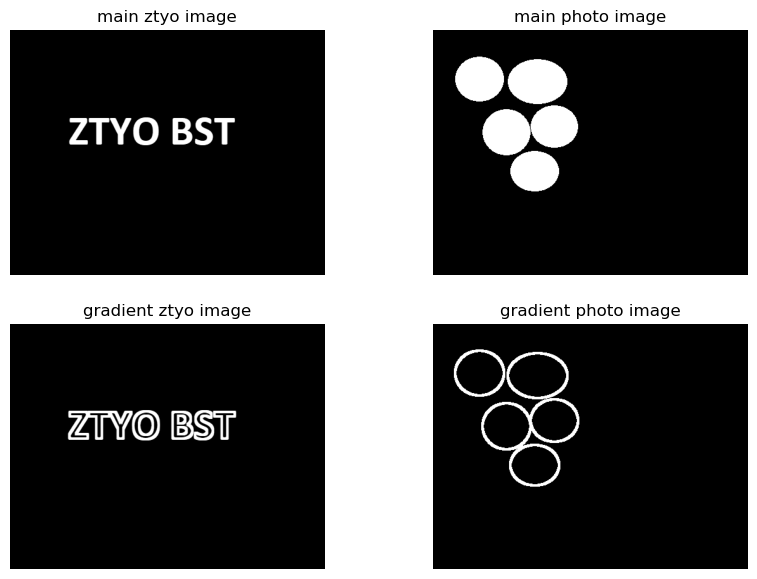

In [80]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

fig.add_subplot(rows,columns,1)
plt.title("main ztyo image")
plt.imshow(new_image,cmap = "gray")
plt.axis("off")


fig.add_subplot(rows,columns,2)
plt.title("main photo image")
plt.imshow(photo,cmap = "gray")
plt.axis("off")

fig.add_subplot(rows,columns,3)
plt.title("gradient ztyo image")
plt.imshow(my_gradient_img_1,cmap = "gray")
plt.axis("off")


fig.add_subplot(rows,columns,4)
plt.title("gradient photo image")
plt.imshow(my_gradient_img_2,cmap = "gray")
plt.axis("off")

